In [1]:
from os import path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym

In [2]:
#Take in the data generated from KEVOLVE model
df = pd.read_csv("kevolve_data_k20.csv")
#Reset index named 
df = df.set_index("Unnamed: 0")

In [4]:
#Generate dataframe as a result 
df

,Alpha(B.1.1.7),Beta(B.1.351),Delta(B1.617.2),Epsilon(B.1.427),Eta(B.1.525),Gamma(P.1),Iota(B.1.526),Kappa(B.1.617.1),Lambda(C.37),Mu(B.1.621),Omicron(BA.1),Zeta(P.2)
Unnamed: 0,,,,,,,,,,,,
GGTTTCCAACCCACTAATGG,0,0,95,100,100,0,100,100,92,0,4,96
TCACTCATGATGTTTCATCT,0,0,1,0,20,0,0,0,0,0,0,0
ATGTACTTAACATCAACCAT,100,0,1,0,0,1,0,0,0,0,0,0
AACAAAAGTTGTATGGAAAG,0,0,0,100,0,0,0,0,0,0,0,0
TACAGGGCTTTTGACATCTA,100,99,100,100,100,100,100,100,0,99,100,94
CCAACCACCACAAACCTCTA,100,100,25,100,100,100,100,100,1,0,1,95
ACTTCTCCTGCTAGAATGGC,100,0,98,0,0,97,100,98,99,0,100,100
GCACTTGGAAAACTTCAAAA,0,1,98,0,0,0,0,0,0,93,0,0
CTCAGACTAATTCTCATCGG,100,1,0,0,0,0,0,0,0,100,0,0


In [5]:
sorted_df =pd.DataFrame(columns = df.columns)
zero_nums = [[idx, len([num for num in df.iloc[idx].tolist() if num ==0 ])] for idx in range(len(df))]
sorted_ind = sorted(zero_nums, key = lambda x:x[1])
sorted_ind = [x[0] for x in sorted_ind]
new_df = df.iloc[sorted_ind]
new_df

,Alpha(B.1.1.7),Beta(B.1.351),Delta(B1.617.2),Epsilon(B.1.427),Eta(B.1.525),Gamma(P.1),Iota(B.1.526),Kappa(B.1.617.1),Lambda(C.37),Mu(B.1.621),Omicron(BA.1),Zeta(P.2)
Unnamed: 0,,,,,,,,,,,,
AACCACCCATTAGTTTTCCA,100,100,3,100,99,100,100,100,100,100,99,100
TACAGGGCTTTTGACATCTA,100,99,100,100,100,100,100,100,0,99,100,94
CCAACCACCACAAACCTCTA,100,100,25,100,100,100,100,100,1,0,1,95
TAGAAAACCCTCACCTTATG,0,100,100,100,99,100,100,90,100,100,100,100
GGTTTCCAACCCACTAATGG,0,0,95,100,100,0,100,100,92,0,4,96
ACTTCTCCTGCTAGAATGGC,100,0,98,0,0,97,100,98,99,0,100,100
TTACCTGTATAGATTGTTTA,99,99,0,0,99,100,100,0,0,98,95,97
ACTAGTTTGTCTGGTTTTAA,1,0,100,99,0,0,0,100,0,100,9,100
CAAAGGCTAGCTCTTGGAGG,13,1,0,0,2,1,0,0,2,0,0,0


In [6]:
len(df.index) 

18

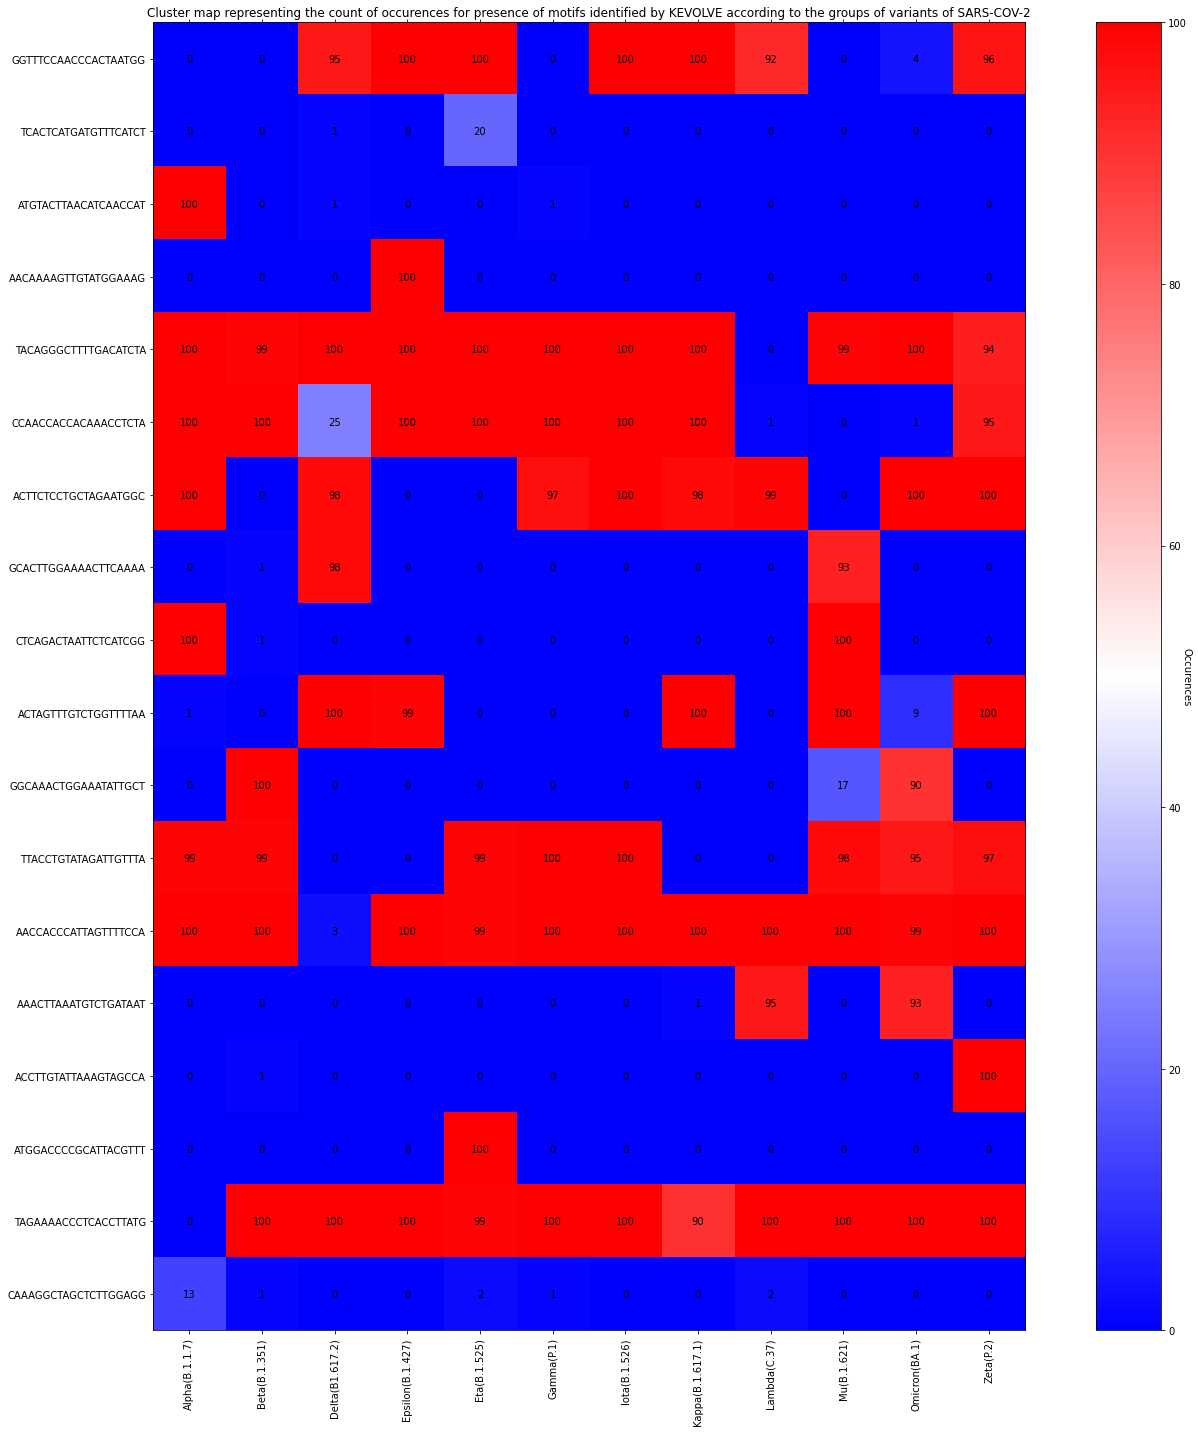

In [7]:
#Graph the Cluster-Map from the DataFrame 
#Set the figure size 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()

#Set the colormap color- 'bwr', blue white red 
ax.matshow(df, cmap = 'bwr')
im = ax.imshow(df, 'bwr')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Occurences", rotation=-90)

#Set the color map, the max and the minimum for the cbar value 
val=max(abs(df).max())
im.set_clim(0,val)

#Generate the y_label from the df.index 
y_label = df.index.to_list()
#Generate the x_label from the df.columns 
x_label = df.columns.to_list()

#Set the  axis and label with the length range for x&y label 
ax.set_xticks(np.arange(len(x_label)),labels = x_label)
ax.set_yticks(np.arange(len(y_label)),labels = y_label)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(labelbottom=True,labeltop=False)

#Plot the value of the occurences for each k-mer solution onto the clustermap 
df_2 =df.to_numpy() 
for i in range(len(y_label)):
    for j in range(len(x_label)):
        text=ax.text(j,i,df_2[i,j],ha="center",va="center")
        #Set the value in center and the value is the occurences (not percentage )
        
ax.set_title("Cluster map representing the count of occurences for presence of motifs identified by KEVOLVE according to the groups of variants of SARS-COV-2")
fig.tight_layout()

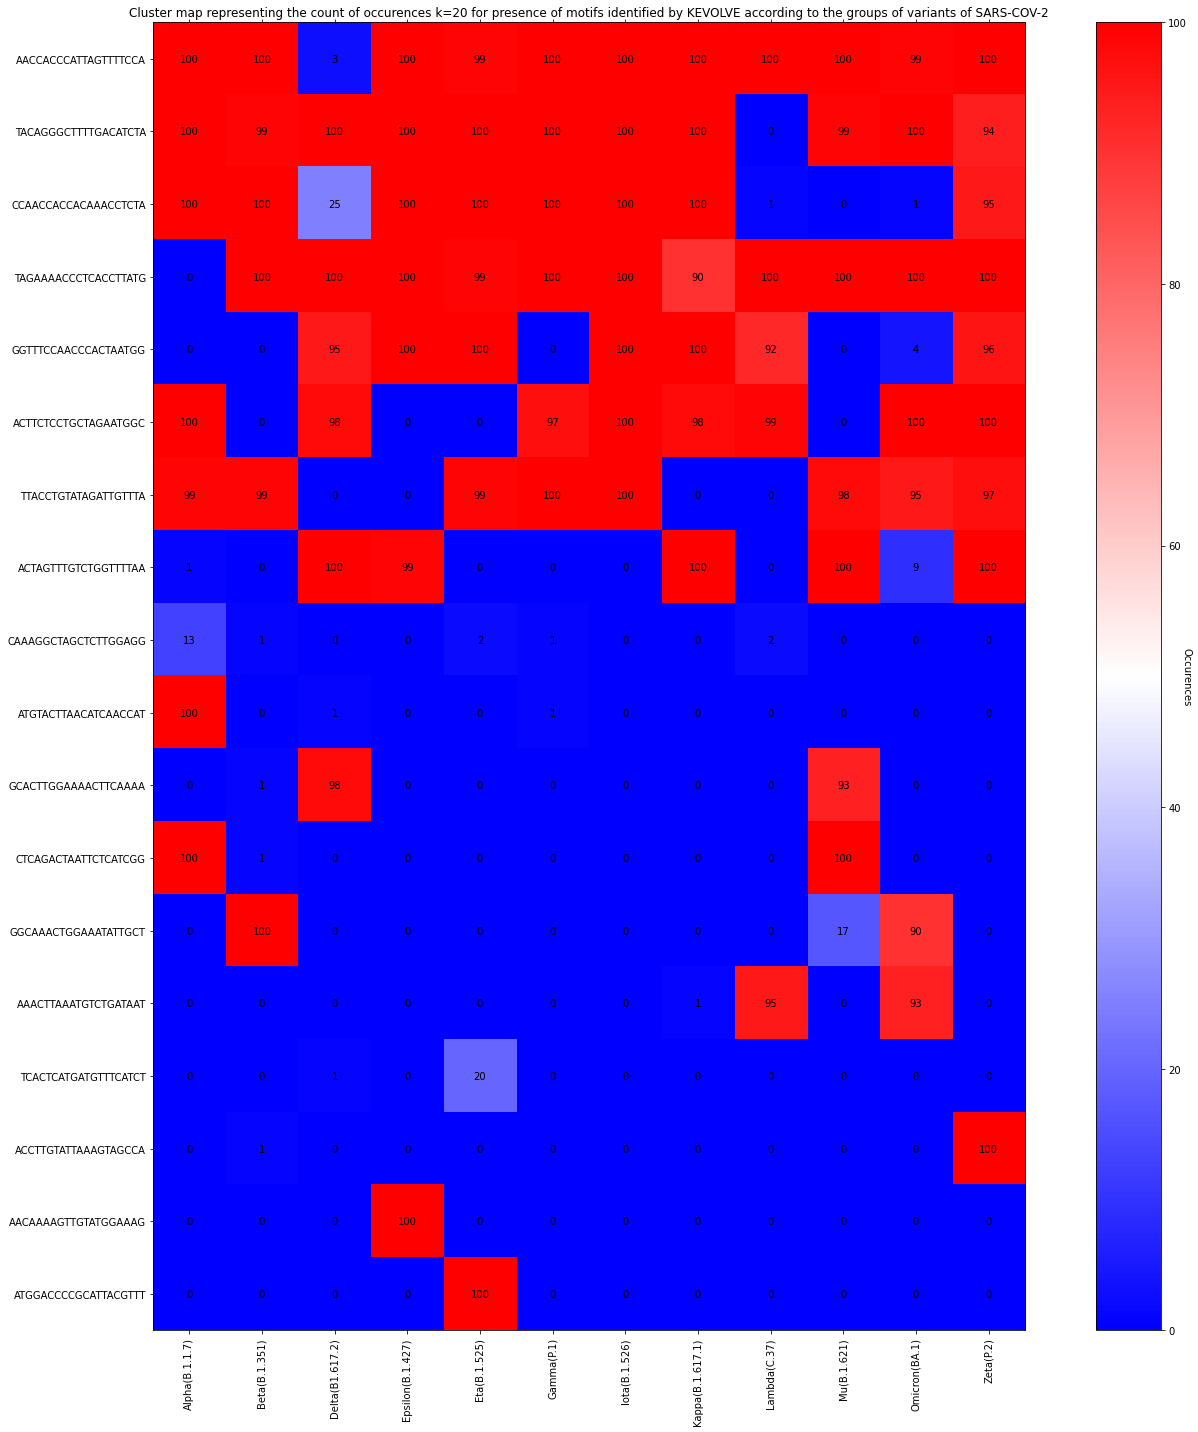

In [9]:
#Graph the Cluster-Map from the DataFrame 
#Set the figure size 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot()

#Set the colormap color- 'bwr', blue white red 
ax.matshow(new_df, cmap = 'bwr')
im = ax.imshow(new_df, 'bwr')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Occurences", rotation=-90)

#Set the color map, the max and the minimum for the cbar value 
val=max(abs(new_df).max())
im.set_clim(0,val)

#Generate the y_label from the df.index 
y_label = new_df.index.to_list()
#Generate the x_label from the df.columns 
x_label = new_df.columns.to_list()

#Set the  axis and label with the length range for x&y label 
ax.set_xticks(np.arange(len(x_label)),labels = x_label)
ax.set_yticks(np.arange(len(y_label)),labels = y_label)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(labelbottom=True,labeltop=False)

#Plot the value of the occurences for each k-mer solution onto the clustermap 
new_df_2 =new_df.to_numpy() 
for i in range(len(y_label)):
    for j in range(len(x_label)):
        text=ax.text(j,i,new_df_2[i,j],ha="center",va="center")
        #Set the value in center and the value is the occurences (not percentage )
        
ax.set_title("Cluster map representing the count of occurences k=20 for presence of motifs identified by KEVOLVE according to the groups of variants of SARS-COV-2")
fig.tight_layout()

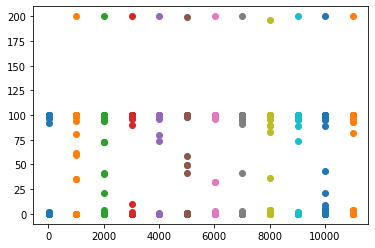

In [9]:
for idx, col in enumerate(df.columns[0:]):
    x_ = [1000 * idx + 10] * len(df[col])
    y_ = df[col]
    plt.scatter(x_,y_)

In [ ]:
plt.show()

In [6]:
df.T

Unnamed: 0,GCATTAATGCTTCAG,ACTTTGTCCGAACAA,ATTATTATGAGGACT,GTTCCCACTTACAAG,ACCTGTATAGATTGT,AGCAAAATGTCTGGT,GTCTAGCTGTCCACG,CTTGCTGTTTTTCAT,AGGCCTTAAATTCCC,GAACAAACTAAATGT,...,GTTGTTTTAGATTTT,TATTTTGCTTCCACT,TAAGCCATTACCATA,AGGCAGCAGTAGGGG,GAGCCCTAATGTGTA,TTGTATCAAAGTAGC,AATGGTGTTGAAGGT,TGAACAACTGGACTT,GTGATTCTTCTTCAG,AATGTCTGATAATGG
Alpha(B.1.1.7),100,0,100,100,99,2,99,0,0,97,...,0,100,0,1,97,100,99,100,99,0
Beta(B.1.351),100,100,100,62,99,100,100,98,0,0,...,98,100,0,99,81,99,0,0,60,100
Delta(B1.617.2),100,99,100,100,0,99,100,0,100,73,...,4,41,73,0,40,100,96,0,98,99
Epsilon(B.1.427),100,100,100,100,0,100,100,100,0,0,...,2,97,0,100,96,100,100,0,100,100
Eta(B.1.525),100,100,100,0,99,100,99,0,0,0,...,0,96,0,100,74,99,0,0,100,0
Gamma(P.1),0,100,100,100,100,100,100,1,0,0,...,0,100,0,49,99,99,99,0,98,100
Iota(B.1.526),100,100,100,100,100,0,100,99,0,97,...,0,0,0,100,96,100,32,0,0,100
Kappa(B.1.617.1),100,100,100,100,0,94,99,0,0,96,...,0,41,0,0,99,100,0,0,91,95
Lambda(C.37),99,100,100,100,0,100,100,0,0,4,...,89,97,0,0,90,100,99,0,36,100
Mu(B.1.621),100,100,100,100,99,100,0,100,0,0,...,2,2,0,100,89,100,1,0,95,100
